## Database statisctics

In [46]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

import networkx as nx

import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

%matplotlib inline

In [47]:
def create_bucket(df):
    print("Creating the buckets...")
    buckets = {}
    G=nx.Graph()
    for row in tqdm(df.iterrows()):
        bug_id = row[1]['bug_id']
        dup_id = row[1]['dup_id']
        if dup_id == '[]':
            G.add_node(bug_id)
        else:
            G.add_edges_from([(int(bug_id), int(dup_id))])
    for g in tqdm(nx.connected_components(G)):
        group = set(g)
        for bug in g:
            master = int(bug)
            query = df[df['bug_id'] == master]
            if query.shape[0] <= 0:
                group.remove(master)
                master = np.random.choice(list(group), 1)
            buckets[int(master)] = group
    return buckets

def read_pairs(file_path):
    n = 0
    with open(file_path, 'r', encoding='utf-8', newline='\n', errors='ignore') as f:
        for row in f:
            pairs = row.split(' ')
            n += len(pairs) // 2
    return n

def getting_pairs(array):
    res = []
    for row in array:
        _, dups = row
        dups = list(dups)
        while len(dups) > 1:
            bucket = dups[0]
            dups.remove(bucket)
            for d in dups:
                res.append([bucket, d])
    return res

In [51]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
    
def display_bug_contents(df, bug_ids):
    for bug in bug_ids:
        bug_report = df[df['bug_id'] == bug]

        printmd("#####################################")
        printmd("**Bug ID**: {}".format(bug_report['bug_id'].values[0]))
        printmd("**Bug status**: {}".format(bug_report['bug_status'].values[0]))
        printmd("**Component**: {}".format(bug_report['component'].values[0]))
        printmd("**Product**: {}".format(bug_report['product'].values[0]))
        printmd("**Resolution**: {}".format(bug_report['resolution'].values[0]))
        printmd("**Title**: {}".format(bug_report['short_desc'].values[0]))
        printmd("**Description**: {}".format(bug_report['description'].values[0]))

### Datasets

In [48]:
domains = ['eclipse', 'netbeans', 'openoffice', 'firefox']

### Eclipse

In [49]:
DATASET_ECLIPSE = os.path.join('data/normalized/{}'.format(domains[0]), '{}.csv'.format(domains[0]))
df_e = pd.read_csv(DATASET_ECLIPSE)

In [50]:
df_e.head()

,bug_id,bug_severity,bug_status,component,creation_ts,delta_ts,description,dup_id,priority,product,resolution,short_desc,version
0,3,normal,RESOLVED,Team,2001-10-10 21:34:00 -0400,2010-05-07 10:28:53 -0400,KM (10/2/2001 5:55:18 PM)\n\tThis PR about the...,[],P5,Platform,FIXED,Sync does not indicate deletion (1GIEN83),2.0
1,1,normal,CLOSED,Team,2001-10-10 21:34:00 -0400,2012-02-09 15:57:47 -0500,- Setup a project that contains a *.gif resour...,[],P3,Platform,FIXED,Usability issue with external editors (1GE6IRL),2.0
2,8,normal,RESOLVED,Team,2001-10-10 21:34:00 -0400,2011-05-17 11:40:32 -0400,"With the current VCM API, a repository adapter...",[],P3,Platform,WONTFIX,how can we support,2.0
3,4,normal,RESOLVED,Team,2001-10-10 21:34:00 -0400,2002-03-01 16:27:31 -0500,- become synchronized with some project in a r...,[],P5,Platform,FIXED,need better error message if catching up over ...,2.0
4,7,normal,RESOLVED,Team,2001-10-10 21:34:00 -0400,2005-05-06 17:18:53 -0400,The platform is able to notify people that a r...,[],P5,Platform,WONTFIX,[Team API] move/copy semantics not preserved f...,2.0


### NullPointerException

In [58]:
df_e[df_e['description'].str.contains('NullPointer')]

,bug_id,bug_severity,bug_status,component,creation_ts,delta_ts,description,dup_id,priority,product,resolution,short_desc,version
93,145,normal,VERIFIED,Team,2001-10-10 21:37:00 -0400,2001-10-23 23:44:26 -0400,*\tConnect to cvslnxtest\n*\texpand Head\n*\te...,[],P3,Platform,FIXED,EXCEPTION - adding file to workspace (1GEVTJY),2.0
104,163,critical,VERIFIED,Team,2001-10-10 21:37:00 -0400,2001-10-23 23:45:08 -0400,AK (6/12/01 4:55:24 PM)\n\ti got this exceptio...,[],P3,Platform,FIXED,exception when disconnected (1GF7QCA),2.0
158,234,normal,RESOLVED,Team,2001-10-10 21:38:00 -0400,2002-03-22 11:04:38 -0500,Did a sync of Eclipse UI. It came up in the c...,[],P3,Platform,FIXED,NPE in sync (1GJ4W10),2.0
203,294,normal,RESOLVED,UI,2001-10-10 21:39:00 -0400,2001-12-02 12:47:06 -0500,I received a null pointer exception when I had...,[],P3,PDE,FIXED,Null Pointer Exception moving mouse over requi...,2.0
205,295,normal,RESOLVED,UI,2001-10-10 21:39:00 -0400,2001-12-02 14:04:47 -0500,When you Apply Body Text from the Extensions p...,[],P3,PDE,FIXED,Null Pointer Exception entering Body Text (1GF...,2.0
218,312,normal,RESOLVED,UI,2001-10-10 21:39:00 -0400,2001-12-02 16:54:04 -0500,from www.eclipse.org news group\n\nSubject: \n...,[],P3,PDE,WORKSFORME,NPE in PDE (1GI8VO4),2.0
222,317,normal,RESOLVED,UI,2001-10-10 21:40:00 -0400,2001-12-02 17:09:00 -0500,This is a posting from the eclipse newsgroup b...,[],P3,PDE,FIXED,EC: Error in ExtensionElementPropertySource::g...,2.0
223,315,normal,RESOLVED,UI,2001-10-10 21:40:00 -0400,2002-03-10 15:01:58 -0500,Build 0.129\n\tFail sniff test on Win-XP (repo...,[],P3,PDE,WONTFIX,NPE in PDE on Win-XP (1GIEGGI),2.0
225,319,normal,RESOLVED,UI,2001-10-10 21:40:00 -0400,2001-12-02 17:10:10 -0500,I got the following in the log when I opened a...,[],P3,PDE,FIXED,Exception when hovering (1GJ873U),2.0
229,325,normal,RESOLVED,UI,2001-10-10 21:40:00 -0400,2002-01-09 20:46:27 -0500,DS (9/20/01 3:52:39 PM)\n\tEdit the source of ...,[],P3,PDE,FIXED,NPE referencing plugin that does not exist (1G...,2.0


In [59]:
display_bug_contents(df_e, [399121, 424407])

#####################################

**Bug ID**: 399121

**Bug status**: RESOLVED

**Component**: wst.validation

**Product**: WTP Common Tools

**Resolution**: FIXED

**Title**: Deleting a validation-disabled resource can lead to NPE

**Description**: If a resource is disabled from validation and then removed, a NPE will be triggered the next time a resource is enabled or disabled.  It most likely occurs because IContainer#findMember() can return a null, and that return result is stored in the disabled list regardless in org.eclipse.wst.validation.internal.DisabledResourceManager#load(IProject) line 91.

#####################################

**Bug ID**: 424407

**Bug status**: CLOSED

**Component**: wst.validation

**Product**: WTP Common Tools

**Resolution**: DUPLICATE

**Title**: NPE in DisabledResourceManager.save()

**Description**: In the context of 424340 we faced a NPE in DisabledResourceManager.save()

java.lang.NullPointerException
	at org.eclipse.wst.validation.internal.DisabledResourceManager.save(DisabledResourceManager.java:67)
	at org.eclipse.wst.validation.internal.DisabledResourceManager.disableValidation(DisabledResourceManager.java:49)
	at org.eclipse.wst.validation.ValidationFramework.disableValidation(ValidationFramework.java:130)
	...

This happens if a disabled resource is deleted. The resource still remains listed in the "disabled" preference. After Eclipse is restarted, the "disabled" preference is deserialized in DisabledResourceManager.load() and the deleted resource cannot be resolved to an existing resource in the project. This results in adding a "null" object in the "_disabled" set, which causes NullPointerException on consecutive save operations.

In [6]:
df_e[df_e['bug_id'] == 26031]['short_desc']

24605    IllegalArgumentException from ProblemPainter
Name: short_desc, dtype: object

In [7]:
df_e[df_e['bug_id'] == 25881]['short_desc']

24459    IndexOutOfBounds exception during Save
Name: short_desc, dtype: object

In [8]:
df_e[df_e['bug_id'] == 161659]['short_desc'].values[0]

'Frequent workspace crashes'

In [9]:
df_e[df_e['bug_id'] == 164827]['short_desc'].values[0]

'Out of memory error with Mylar?'

#### Bug status

In [10]:
df_e.groupby('bug_status').count()

,bug_id,bug_severity,component,creation_ts,delta_ts,description,dup_id,priority,product,resolution,short_desc,version
bug_status,,,,,,,,,,,,
CLOSED,98510,98510,98510,98510,98510,98510,98510,98510,98510,98510,98510,98510
RESOLVED,218989,218989,218989,218989,218989,218988,218989,218989,218989,218989,218989,218989
VERIFIED,43507,43507,43507,43507,43507,43507,43507,43507,43507,43507,43507,43507


#### Bug Resolution

In [11]:
df_e.groupby('resolution').count()

,bug_id,bug_severity,bug_status,component,creation_ts,delta_ts,description,dup_id,priority,product,short_desc,version
resolution,,,,,,,,,,,,
DUPLICATE,39523,39523,39523,39523,39523,39523,39523,39523,39523,39523,39523,39523
FIXED,234277,234277,234277,234277,234277,234277,234277,234277,234277,234277,234277,234277
INVALID,23070,23070,23070,23070,23070,23070,23069,23070,23070,23070,23070,23070
MOVED,21,21,21,21,21,21,21,21,21,21,21,21
NDUPLICATE,6259,6259,6259,6259,6259,6259,6259,6259,6259,6259,6259,6259
NOT_ECLIPSE,3514,3514,3514,3514,3514,3514,3514,3514,3514,3514,3514,3514
WONTFIX,29102,29102,29102,29102,29102,29102,29102,29102,29102,29102,29102,29102
WORKSFORME,25240,25240,25240,25240,25240,25240,25240,25240,25240,25240,25240,25240


#### Empty textual features

In [12]:
total_issues_no_description = df_e[ df_e['description'] == ' ' ].shape[0]
total_issues_no_title = df_e[ df_e['short_desc'] == ' ' ].shape[0]

print("Total issues no description: {} ({}%)".format(total_issues_no_description, round((total_issues_no_description / df_e.shape[0]) * 100.0), 2))
print("Total issues no title: {} ({}%)".format(total_issues_no_title, round((total_issues_no_title / df_e.shape[0]) * 100.0), 2))

Total issues no description: 3052 (1%)
Total issues no title: 0 (0%)


#### Export eclipse dataset

In [13]:
df_e_filtered = df_e[df_e['resolution'].isin(['DUPLICATE', 'FIXED', 'MOVED', 'NDUPLICATE', 'WONTFIX', 'WORKSFORME'])]
df_e_filtered.groupby('resolution').count()
df_e_filtered.to_csv(DATASET_ECLIPSE, index=False)

### Netbeans

In [60]:
DATASET_NETBEANS = os.path.join('data/normalized/{}'.format(domains[1]), '{}.csv'.format(domains[1]))
df_n = pd.read_csv(DATASET_NETBEANS)

In [61]:
df_n.head()

,bug_id,bug_severity,bug_status,component,creation_ts,delta_ts,description,dup_id,priority,product,resolution,short_desc,version
0,296,normal,CLOSED,debuggertools,1998-06-29 18:54:00 +0000,2002-07-19 15:17:46 +0000,[pslegr]\nIs it now possible to fix that?,[],P4,obsolete,WONTFIX,Debugger does not stop on breakpoints in stati...,3.x
1,302,normal,CLOSED,Code,1998-06-29 19:26:00 +0000,2003-06-30 17:26:30 +0000,Problem appears in:\nStep Over & Step Into act...,[],P4,debugger,WONTFIX,Problem with .class without .java sources.,3.x
2,301,normal,CLOSED,Code,1998-06-29 19:23:00 +0000,2003-06-30 17:26:28 +0000,Priority is changed to P4 (normal).,[],P4,debugger,WONTFIX,Step out action.,3.x
3,365,normal,CLOSED,Code,1998-07-21 22:44:00 +0000,2002-07-19 15:19:34 +0000,"Use gridlayout, set number of columns to one, ...",[],P4,guibuilder,FIXED,After reopen of GridLayout number of cells is bad,3.x
4,367,normal,CLOSED,Code,1998-07-21 23:46:00 +0000,2002-07-19 15:19:34 +0000,Special editor for String to support localizat...,[],P4,guibuilder,FIXED,Property Editor for java.lang.String,3.x


In [62]:
df_n[df_n['resolution'] == 'DUPLICATE']

,bug_id,bug_severity,bug_status,component,creation_ts,delta_ts,description,dup_id,priority,product,resolution,short_desc,version
11,755,normal,CLOSED,Text,1998-09-25 19:07:00 +0000,2008-12-23 10:34:57 +0000,External deleting .java file do not cloze open...,19796,P4,platform,DUPLICATE,External deleting .java file do not close open...,3.x
17,1035,enhancement,RESOLVED,-- Other --,1999-01-15 00:59:00 +0000,2008-12-22 09:49:09 +0000,"Since all logging done by NetBeans--that is, t...",69277,P3,platform,DUPLICATE,VM thread dumps (e.g. initiated by Ctrl-\ or C...,3.x
59,1315,enhancement,RESOLVED,Unsupported,1999-03-12 06:59:00 +0000,2007-09-26 09:14:13 +0000,Should this be an InstanceCookie? Or a variant...,48372,P4,java,DUPLICATE,Have action on interfaces & abstract classes t...,3.x
610,1921,normal,RESOLVED,Unsupported,1999-05-24 23:10:00 +0000,2007-09-26 09:14:13 +0000,"Could be, say, an option in either the Editor ...",10156,P2,java,DUPLICATE,"Request for ""find-all-uses-of-this-method"" typ...",3.x
629,1942,enhancement,CLOSED,-- Other --,1999-05-26 20:04:00 +0000,2007-11-05 13:44:44 +0000,Look at Emacs folding-mode (or several similar...,21425,P4,editor,DUPLICATE,Add hide/unhide support to Editor.,3.x
702,2026,normal,CLOSED,-- Other --,1999-06-04 20:34:00 +0000,2008-12-23 11:38:13 +0000,There is none what so ever indication if you a...,2698,P4,platform,DUPLICATE,Long names/values of properties aren`t shown v...,3.x
847,2195,enhancement,RESOLVED,Code,1999-06-10 19:07:00 +0000,2004-03-25 09:38:17 +0000,just a suggestion about the look and feel. Wou...,38043,P4,guibuilder,DUPLICATE,Change Look & Feel for a Form at design time t...,3.x
850,2196,enhancement,RESOLVED,Completion & Templates,1999-06-10 19:12:00 +0000,2007-11-05 13:38:00 +0000,this is a new suggestion for the editor. When ...,47399,P4,editor,DUPLICATE,Automatically suggest import statements for ne...,3.x
878,2217,enhancement,CLOSED,Search,1999-06-11 02:03:00 +0000,2003-07-01 15:52:53 +0000,In some cases it is sensible to want to add ne...,18177,P4,utilities,DUPLICATE,"Provide facility for ""tool"" node properties, a...",3.x
1055,2431,normal,CLOSED,Unsupported,1999-07-12 22:30:00 +0000,2007-09-26 09:14:13 +0000,X2 had an option to see parser error messages ...,17578,P4,java,DUPLICATE,Re-add parser error messages.,3.x


In [ ]:
df_n[df_n['description'].str.contains('NullPointer')]

In [72]:
display_bug_contents(df_n, [11213, 5251])

#####################################

**Bug ID**: 11213

**Bug status**: CLOSED

**Component**: -- Other --

**Product**: platform

**Resolution**: WONTFIX

**Title**: Filesystem's state could be changed to read-only when I have file lock

**Description**: How to reproduce:
Let have a read-write FS.
Open some file from it into the editor.
Edit file but do not save it.
Set FS state to read-only.
ERROR - FS state could be changed and file could be saved although FS is read-
only.

#####################################

**Bug ID**: 5251

**Bug status**: CLOSED

**Component**: -- Other --

**Product**: platform

**Resolution**: DUPLICATE

**Title**: Saving (CTRL-S or File/Save) a file on read-only filesystem causes uncaught IOException. Save All action correctly reports that it can`t save file.

**Description**: java.io.IOException: File Outer/Inner/Pokus.java is readonly.
        at org.openide.text.EditorSupport$5.run(EditorSupport.java:422)
        at org.openide.filesystems.FileSystem.runAtomicAction(FileSystem.java:357)
        at org.openide.text.EditorSupport.saveDocument(EditorSupport.java:412)
        at com.netbeans.developer.modules.loaders.java.JavaEditor.saveDocument(JavaEditor.java:294)

[jglick] FileLock should not have been taken at all to begin with, initial FileObject.lock() should have failed. Perhaps this is Jarda`s problem?

#### Bug status

In [15]:
df_n.groupby('bug_status').count()

,bug_id,bug_severity,component,creation_ts,delta_ts,description,dup_id,priority,product,resolution,short_desc,version
bug_status,,,,,,,,,,,,
CLOSED,37854,37854,37854,37854,37854,37753,37854,37854,37854,37854,37853,37854
RESOLVED,126603,126603,126603,126603,126603,126603,126603,126603,126603,126603,126603,126603
VERIFIED,52258,52258,52258,52258,52258,52258,52258,52258,52258,52258,52258,52258


#### Bug resolution

In [16]:
df_n.groupby('resolution').count()

,bug_id,bug_severity,bug_status,component,creation_ts,delta_ts,description,dup_id,priority,product,short_desc,version
resolution,,,,,,,,,,,,
DUPLICATE,36232,36232,36232,36232,36232,36232,36232,36232,36232,36232,36232,36232
FIXED,120608,120608,120608,120608,120608,120608,120522,120608,120608,120608,120608,120608
INCOMPLETE,4839,4839,4839,4839,4839,4839,4839,4839,4839,4839,4839,4839
INVALID,15198,15198,15198,15198,15198,15198,15194,15198,15198,15198,15197,15198
NDUPLICATE,13,13,13,13,13,13,13,13,13,13,13,13
WONTFIX,19832,19832,19832,19832,19832,19832,19826,19832,19832,19832,19832,19832
WORKSFORME,19993,19993,19993,19993,19993,19993,19988,19993,19993,19993,19993,19993


In [17]:
df_n[df_n['resolution'] == 'INCOMPLETE']

,bug_id,bug_severity,bug_status,component,creation_ts,delta_ts,description,dup_id,priority,product,resolution,short_desc,version
1114,2501,normal,RESOLVED,applet,1999-07-15 20:59:00 +0000,2011-09-19 23:22:34 +0000,[jglick] There were some rumours of Sun coming...,[],P4,obsolete,INCOMPLETE,Suggest providing support in Applet module for...,3.x
7531,10209,blocker,RESOLVED,rmi,2001-03-13 09:34:00 +0000,2011-09-19 23:23:19 +0000,Description: \nit is usefull to have Startup a...,[],P4,obsolete,INCOMPLETE,RMID Wrapper could have Startup action in IDE,3.x
8707,11392,blocker,RESOLVED,vcsgeneric,2001-04-13 13:45:00 +0000,2011-09-19 23:23:27 +0000,NetBeans release 3.2 build #29 (RC2) on Window...,[],P4,obsolete,INCOMPLETE,"ALL: The meaning of ""Unix Shell"" settings sho...",3.x
9101,11794,blocker,RESOLVED,vcscore,2001-04-26 18:35:00 +0000,2011-09-19 23:23:34 +0000,"[NB32-38, RC4]\n\nthere has been an Issue #115...",[],P4,obsolete,INCOMPLETE,Better handling (de)serialization: contextual too,3.x
9841,12540,blocker,RESOLVED,rmi,2001-05-31 21:13:00 +0000,2011-09-19 23:00:02 +0000,This suggestion is based on my experience usin...,[],P3,obsolete,INCOMPLETE,Force generation of stubs for marked Java file,3.x
10027,12731,blocker,RESOLVED,vcsgeneric,2001-06-10 17:04:00 +0000,2011-09-19 23:00:23 +0000,Could the CVS Checkout Select be extended to m...,[],P3,obsolete,INCOMPLETE,"CVS Checkout Select, cater for PARTIAL & WILDC...",3.x
10916,13633,blocker,RESOLVED,netbrowser,2001-07-16 16:50:00 +0000,2011-09-19 22:42:51 +0000,"Currently, we use JTidy to get ""corrected"" pag...",[],P2,obsolete,INCOMPLETE,Loading page is synchronous,3.x
11231,13949,blocker,RESOLVED,vcscore,2001-07-26 10:06:00 +0000,2011-09-19 23:23:44 +0000,in general all command line based vcs tools sh...,[],P4,obsolete,INCOMPLETE,"Support ""Command-Line Style""",3.x
12707,15451,blocker,RESOLVED,Code,2001-09-13 15:30:00 +0000,2011-09-19 23:19:01 +0000,a FS should be converted before a JSP compilation,[],P3,javaee,INCOMPLETE,a FS should be converted before a JSP compilation,3.x
12899,15644,blocker,RESOLVED,corba,2001-09-19 15:27:00 +0000,2011-09-19 23:23:53 +0000,Now implementation generator generates impleme...,[],P4,obsolete,INCOMPLETE,Action for faster access to implementations,3.x


#### Empty textual features

In [18]:
total_issues_no_description = df_n[ df_n['description'] == ' ' ].shape[0]
total_issues_no_title = df_n[ df_n['short_desc'] == ' ' ].shape[0]

print("Total issues no description: {} ({}%)".format(total_issues_no_description, round((total_issues_no_description / df_n.shape[0]) * 100.0), 2))
print("Total issues no title: {} ({}%)".format(total_issues_no_title, round((total_issues_no_title / df_n.shape[0]) * 100.0), 2))

Total issues no description: 2 (0%)
Total issues no title: 0 (0%)


### OpenOffice

In [19]:
DATASET_OPENOFFICE = os.path.join('data/normalized/{}'.format(domains[2]), '{}.csv'.format(domains[2]))
df_o = pd.read_csv(DATASET_OPENOFFICE)

#### Bug status

In [20]:
df_o.groupby('bug_status').count()

,bug_id,bug_severity,component,creation_ts,delta_ts,description,dup_id,priority,product,resolution,short_desc,version
bug_status,,,,,,,,,,,,
CLOSED,89999,89999,89999,89999,89999,89999,89999,89999,89999,89999,89999,89999
RESOLVED,5159,5159,5159,5159,5159,5159,5159,5159,5159,5159,5159,5159
VERIFIED,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912


#### Bug resolution

In [21]:
df_o.groupby('resolution').count()

,bug_id,bug_severity,bug_status,component,creation_ts,delta_ts,description,dup_id,priority,product,short_desc,version
resolution,,,,,,,,,,,,
DUPLICATE,14567,14567,14567,14567,14567,14567,14567,14567,14567,14567,14567,14567
FIXED,48033,48033,48033,48033,48033,48033,48033,48033,48033,48033,48033,48033
IRREPRODUCIBLE,13910,13910,13910,13910,13910,13910,13910,13910,13910,13910,13910,13910
MOVED,5,5,5,5,5,5,5,5,5,5,5,5
NDUPLICATE,5095,5095,5095,5095,5095,5095,5095,5095,5095,5095,5095,5095
NOT_AN_ISSUE,11926,11926,11926,11926,11926,11926,11926,11926,11926,11926,11926,11926
OBSOLETE,191,191,191,191,191,191,191,191,191,191,191,191
WONTFIX,4343,4343,4343,4343,4343,4343,4343,4343,4343,4343,4343,4343


In [22]:
df_o[df_o['resolution'].isin(['OBSOLETE'])]

,bug_id,bug_severity,bug_status,component,creation_ts,delta_ts,description,dup_id,priority,product,resolution,short_desc,version
3831,3988,trivial,CLOSED,ui,2002-04-12 02:38:00 +0000,2013-12-04 15:13:58 +0000,At present the only elements that are common t...,[],P3,Writer,OBSOLETE,relax constraint that objects and frames in he...,641
7741,8250,trivial,RESOLVED,code,2002-10-11 17:22:00 +0000,2013-08-15 16:43:54 +0000,Could anyone help.\n\nI have a macro written i...,[],P3,Writer,OBSOLETE,Importing a Word97 Macro,OOo 1.0.1
9078,9699,major,RESOLVED,ui,2002-11-30 18:00:00 +0000,2013-10-31 06:34:36 +0000,Openoffice 643C is installedin my windows 98 s...,[],P4,Writer,OBSOLETE,CRASH when insert rows into table with maximum...,643C
11502,12375,trivial,RESOLVED,code,2003-03-15 16:17:00 +0000,2013-09-19 09:38:54 +0000,OO 1.02 was working fine until I renamed my ho...,[],P3,Installation,OBSOLETE,Repair doesn't work,OOo 1.0.2
12115,13071,trivial,RESOLVED,ui,2003-04-05 20:29:00 +0000,2013-08-15 16:46:32 +0000,It would be nice to have audio feedback to spe...,[],P3,ui,OBSOLETE,Audio Feedback,OOo 1.1 Beta
14597,15904,trivial,CLOSED,nl,2003-06-22 07:48:00 +0000,2013-07-11 20:55:43 +0000,Als je bij het gebruik van de Nederlandstalige...,[],P3,Native-Lang,OBSOLETE,Fouten in de vertaling van het gebruikersinter...,OOo 1.1
15294,16628,trivial,CLOSED,nl,2003-07-09 22:17:00 +0000,2013-07-12 17:10:30 +0000,De GUI elementen die overeenkomen met de nieuw...,[],P3,Native-Lang,OBSOLETE,Onvolledige vertaling GUI 1.1 in het Nederlands,OOo 1.1 RC
18136,20064,trivial,CLOSED,code,2003-09-25 14:59:00 +0000,2013-07-27 10:42:16 +0000,Product Requirement:\nReduce retraining. Tools...,[],P4,General,OBSOLETE,Q-PCD Remove Main Toolbar,OOo 1.0.0
18174,19958,trivial,CLOSED,Website general issues,2003-09-23 23:52:00 +0000,2013-08-05 15:13:59 +0000,hi\nthe awards page needs to be updated and ne...,[],P3,Infrastructure,OBSOLETE,update awards page,current
19971,22240,minor,RESOLVED,ui,2003-11-07 11:56:00 +0000,2013-12-31 07:58:31 +0000,On PC the OOo-native Open and Save dialogs do ...,[],P3,ui,OBSOLETE,OOo's Open&Save Dialogs should show folder sho...,OOo 1.1


#### Empty textual features

In [23]:
total_issues_no_description = df_o[ df_o['description'] == ' ' ].shape[0]
total_issues_no_title = df_o[ df_o['short_desc'] == ' ' ].shape[0]

print("Total issues no description: {} ({}%)".format(total_issues_no_description, round((total_issues_no_description / df_o.shape[0]) * 100.0), 2))
print("Total issues no title: {} ({}%)".format(total_issues_no_title, round((total_issues_no_title / df_o.shape[0]) * 100.0), 2))

Total issues no description: 0 (0%)
Total issues no title: 0 (0%)


#### Export OpenOffice dataset

In [24]:
df_o_filtered = df_o[df_o['resolution'].isin(['DUPLICATE', 'FIXED', 'MOVED', 'NDUPLICATE', 'WONTFIX', 'OBSOLETE'])]
df_o_filtered.groupby('resolution').count()
df_o_filtered.to_csv(DATASET_OPENOFFICE, index=False)

## Firefox

In [25]:
DATASET_FIREFOX = os.path.join('data/normalized/{}'.format(domains[3]), '{}.csv'.format(domains[3]))
df_f = pd.read_csv(DATASET_FIREFOX)

In [26]:
df_f.tail(50)

,bug_id,priority,component,dup_id,short_desc,description,bug_status,resolution,version,creation_ts,delta_ts
115764,952856,--,Untriaged,463607,Clear recent history is disabled when browser....,User Agent: Mozilla/5.0 (Windows NT 5.1; rv:29...,RESOLVED,DUPLICATE,29 Branch,2013-12-22 12:35:12 -0800,2014-01-08 08:08:54 -0800
115765,952865,--,Developer Tools: Console,[],Intermittent browser_console.js | Timed out wh...,https://tbpl.mozilla.org/php/getParsedLog.php?...,RESOLVED,FIXED,Trunk,2013-12-22 16:38:27 -0800,2014-01-19 18:41:16 -0800
115766,952905,--,Toolbars and Customization,[],Move to Menu and Menu Bar share access key,Right click on the toolbar or tab area.; Menu ...,RESOLVED,FIXED,unspecified,2013-12-22 23:39:15 -0800,2014-01-07 13:19:11 -0800
115767,952926,--,Developer Tools: Inspector,[],Add pointer-events:none to the infobar when an...,Right now; when you inspect an element then sw...,RESOLVED,WORKSFORME,unspecified,2013-12-23 03:20:35 -0800,2014-01-20 08:10:57 -0800
115768,952929,--,Theme,637608,tab scrolling arrows have wrong activation sta...,Created attachment 8351178; Capture d cran de ...,RESOLVED,DUPLICATE,Trunk,2013-12-23 03:55:28 -0800,2013-12-24 03:43:34 -0800
115769,952934,--,Session Restore,[],Use onFrameTreeReset() to re-collect docShell ...,The DocShellCapabilitiesListener in content-se...,RESOLVED,FIXED,Trunk,2013-12-23 04:51:02 -0800,2014-01-07 08:24:36 -0800
115770,952952,--,PDF Viewer,951610,pdf viewer should have a find in document butt...,Find functionality works fine; but is poorly s...,RESOLVED,DUPLICATE,Trunk,2013-12-23 07:57:30 -0800,2014-01-06 15:11:23 -0800
115771,952956,P4,Build Config,[],why does a debug build finish twice as fast as...,User Agent: Mozilla/5.0 (Windows NT 6.1; WOW64...,RESOLVED,INVALID,29 Branch,2013-12-23 08:25:04 -0800,2013-12-30 09:43:57 -0800
115772,952963,--,Toolbars and Customization,[],areaType getter in widget wrapper assumes area...,At http://mxr.mozilla.org/mozilla-central/sour...,RESOLVED,FIXED,Trunk,2013-12-23 10:17:31 -0800,2014-01-03 03:39:11 -0800
115773,952966,--,Untriaged,636374,close tab dialog must not reopen again,User Agent: Mozilla/5.0 (Windows NT 6.1; WOW64...,RESOLVED,DUPLICATE,26 Branch,2013-12-23 10:20:36 -0800,2013-12-26 05:25:25 -0800


In [27]:
df_f.iloc[115795]['description']

'User Agent: Mozilla/5.0 (Windows NT 6.1; WOW64; rv:26.0) Gecko/20100101 Firefox/26.0 (Beta/Release); Build ID: 20131205075310; ; Steps to reproduce:; ; Recently Firefox find bar behavior was modified to include a per-tab behavior remembering search terms for each tab still duplicating the current search terms when opening a new tab. However the search bar (search engine) was not altered and still displays the same value on each tab.; ; This is especially irritating since the search bar is located within the tab just like the URL bar is since quite long time. So users might expect the value there to be tab-specific.; ; Steps to reproduce:; - Just open any tab.; - Enter search term in search bar.; - On new tab enter another search term.; - Switch back to first tab.; ; ; Actual results:; ; - Search terms on first tab will display equal value as entered on any other tab.; ; ; Expected results:; ; When a tab is created it should perhaps inherit the search terms from its parent (just like t

### Bug status

In [28]:
df_f.groupby('bug_status').count()

,bug_id,priority,component,dup_id,short_desc,description,resolution,version,creation_ts,delta_ts
bug_status,,,,,,,,,,
RESOLVED,97929,97929,97929,97929,97927,97197,97929,97929,97929,97929
VERIFIED,17885,17885,17885,17885,17883,17832,17885,17885,17885,17885


### Bug resolution

In [29]:
df_f.groupby('resolution').count()

,bug_id,priority,component,dup_id,short_desc,description,bug_status,version,creation_ts,delta_ts
resolution,,,,,,,,,,
DUPLICATE,35814,35814,35814,35814,35813,35717,35814,35814,35814,35814
EXPIRED,2151,2151,2151,2151,2151,2151,2151,2151,2151,2151
FIXED,19270,19270,19270,19270,19270,18788,19270,19270,19270,19270
INCOMPLETE,17056,17056,17056,17056,17056,17022,17056,17056,17056,17056
INVALID,17388,17388,17388,17388,17385,17283,17388,17388,17388,17388
NDUPLICATE,22,22,22,22,22,22,22,22,22,22
WONTFIX,4715,4715,4715,4715,4715,4678,4715,4715,4715,4715
WORKSFORME,19398,19398,19398,19398,19398,19368,19398,19398,19398,19398


### Empty textual features

In [30]:
total_issues_no_description = df_f[ df_f['description'] == ' ' ].shape[0]
total_issues_no_title = df_f[ df_f['short_desc'] == ' ' ].shape[0]

print("Total issues no description: {} ({}%)".format(total_issues_no_description, round((total_issues_no_description / df_f.shape[0]) * 100.0), 2))
print("Total issues no title: {} ({}%)".format(total_issues_no_title, round((total_issues_no_title / df_f.shape[0]) * 100.0), 2))

Total issues no description: 292 (0%)
Total issues no title: 16 (0%)


### Total of bugs and pairs

In [36]:
df = pd.DataFrame(columns=['domain', 'train_pairs', 'test_pairs', 'total_bugs'])

rows = []

for DOMAIN in domains[:-1]:
    METHOD = 'baseline'
    DIR = 'data/processed/{}'.format(DOMAIN)
    DATASET = os.path.join('data/normalized/{}'.format(DOMAIN), '{}.csv'.format(DOMAIN))
    TRAIN = os.path.join(DIR, 'bert', 'train_chronological.txt')
    TEST = os.path.join(DIR, 'bert', 'test_chronological.txt')
    
    dataset = pd.read_csv(DATASET)
    
    n_train = read_pairs(TRAIN)
    n_test = read_pairs(TEST)
    
    rows.append({ 'domain' : DOMAIN, 'train_pairs' : n_train, 'test_pairs' : n_test, 'total_bugs' :  dataset.shape[0] })
    
df.append(rows)

,domain,train_pairs,test_pairs,total_bugs
0,eclipse,773181,28025,334422
1,netbeans,1280106,35025,216715
2,openoffice,1226059,23065,72234


### Buckets statistics

In [37]:
def get_info_dict(DOMAIN, dataset):
        if dataset is None: return
        # self.info_dict = {'bug_severity': 7, 'bug_status': 3, 'component': 323, 'priority': 5, 'product': 116, 'version': 197}
        df = pd.read_csv(dataset)
        if DOMAIN != 'firefox':
            info_dict = {
                'bug_severity' : df['bug_severity'].unique().shape[0],
                'product' : df['product'].unique().shape[0],
                'bug_status' : df['bug_status'].unique().shape[0],
                'component' : df['component'].unique().shape[0],
                'priority' : df['priority'].unique().shape[0],
                'version' : df['version'].unique().shape[0]
            }
        else:
            info_dict = {
                'bug_status' : df['bug_status'].unique().shape[0],
                'component' : df['component'].unique().shape[0],
                'priority' : df['priority'].unique().shape[0],
                'version' : df['version'].unique().shape[0]
            }
        return info_dict

In [42]:
import _pickle as pickle

bucket_stats = {}

for DOMAIN in domains[:-1]:
    DIR = 'data/processed/{}'.format(DOMAIN)
    DATASET = os.path.join('data/normalized/{}'.format(DOMAIN), '{}.csv'.format(DOMAIN))
    VOCAB = os.path.join(DIR, 'bert', 'word_vocab_bert.pkl')
    
    if DOMAIN not in bucket_stats:
        bucket_stats[DOMAIN] = { 'duplicate' : { }, 'non-duplicate' : 0, 'info' : {}, 'vocab' : { 'distinct' : 0, 'size' : 0 } }
        
    dataset = pd.read_csv(DATASET)
    # Buckets
    buckets = create_bucket(dataset)
    # Vocabulary
    with open(VOCAB, 'rb') as f:
        vocab = pickle.load(f)
        bucket_stats[DOMAIN]['vocab']['distinct'] = len(vocab)
        bucket_stats[DOMAIN]['vocab']['size'] = sum([vocab[key] for key in vocab])
    
    # Info
    bucket_stats[DOMAIN]['info'] = get_info_dict(DOMAIN, DATASET)
    for key in buckets:
        bucket_size = len(buckets[key])
        if bucket_size > 1:
            if bucket_size not in bucket_stats[DOMAIN]['duplicate']:
                bucket_stats[DOMAIN]['duplicate'][bucket_size] = 1
            else:
                bucket_stats[DOMAIN]['duplicate'][bucket_size] += 1
        else:
            bucket_stats[DOMAIN]['non-duplicate'] += 1
bucket_stats

Creating the buckets...


Creating the buckets...


Creating the buckets...


Creating the buckets...


FileNotFoundError: [Errno 2] No such file or directory: 'data/processed/firefox/bert/word_vocab_bert.pkl'

In [45]:
df_master = pd.DataFrame(columns=['domain', 'groups', 'distinct_groups', 'smallest duplicate group', 'biggest duplicate group', 
                                  '50% of duplicates', 'duplicate', 'non-duplicate', 'distinct vocab', 'vocab size', 
                                  'number_severity', 'number_status', 'number_component', 'number_priority', 'number_product',
                                 'number_version'])

rows = []
for index, domain in enumerate(domains[:-1]):
    buckets = pd.DataFrame(data=list(bucket_stats[domain]['duplicate'].keys()), columns=['buckets']).describe()
    rows.append({ 'domain': domain, 
                 'groups' : sum([bucket_stats[domain]['duplicate'][key] for key in bucket_stats[domain]['duplicate']]),
                 'distinct_groups' : len(bucket_stats[domain]['duplicate'].keys()),
                 'smallest duplicate group' : int(buckets['buckets']['min']),
                 '50% of duplicates' : 'duplicate group between 2 and {:.0f} evidences'.format(buckets['buckets']['50%']),
                 'biggest duplicate group' : int(buckets['buckets']['max']),
                'duplicate' : sum([bucket_stats[domain]['duplicate'][key] * key for key in bucket_stats[domain]['duplicate']]),
                'non-duplicate': bucket_stats[domain]['non-duplicate'],
                'distinct vocab' : bucket_stats[domain]['vocab']['distinct'],
                'vocab size' : bucket_stats[domain]['vocab']['size'],
                'number_severity' : bucket_stats[domain]['info']['bug_severity'] if domain != 'firefox' else 0,
                 'number_product' : bucket_stats[domain]['info']['product'] if domain != 'firefox' else 0,
                 'number_status' : bucket_stats[domain]['info']['bug_status'],
                 'number_component' : bucket_stats[domain]['info']['component'],
                 'number_priority' : bucket_stats[domain]['info']['priority'],
                 'number_version' : bucket_stats[domain]['info']['version']
                })
df_master.append(rows)

,domain,groups,distinct_groups,smallest duplicate group,biggest duplicate group,50% of duplicates,duplicate,non-duplicate,distinct vocab,vocab size,number_severity,number_status,number_component,number_priority,number_product,number_version
0,eclipse,62521,35,2,50,duplicate group between 2 and 19 evidences,233415,271901,19998,199989999,7,3,908,5,189,547
1,netbeans,53794,43,2,56,duplicate group between 2 and 23 evidences,248666,162921,19061,181689452,7,3,473,4,39,18
2,openoffice,19794,38,2,99,duplicate group between 2 and 20 evidences,132518,52440,19998,199989999,6,3,137,5,41,537


Vocab size is defined to used at maximum of 200.000 words to be processed. Only eclipse and firefox has reached this value.

eclipse          buckets
count  35.000000
mean   20.457143
std    12.645257
min     2.000000
25%    10.500000
50%    19.000000
75%    28.500000
max    50.000000
netbeans          buckets
count  43.000000
mean   24.674419
std    14.791762
min     2.000000
25%    12.500000
50%    23.000000
75%    36.500000
max    56.000000
openoffice          buckets
count  38.000000
mean   22.947368
std    17.753488
min     2.000000
25%    11.250000
50%    20.500000
75%    29.750000
max    99.000000


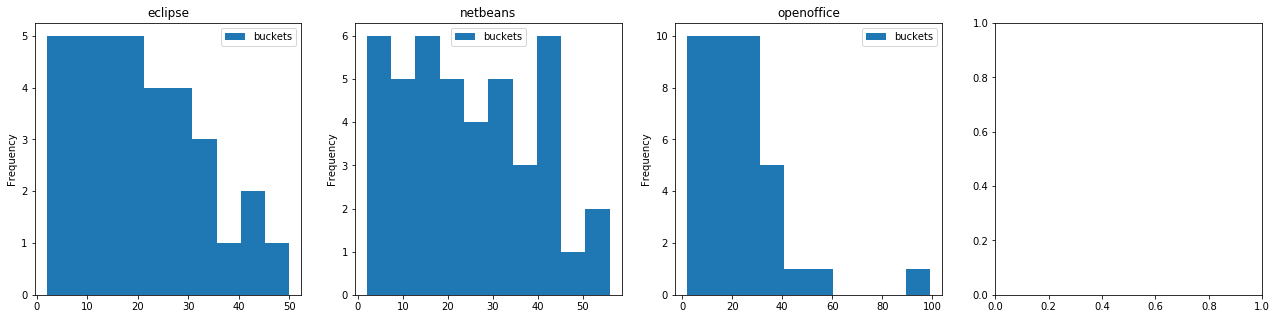

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=len(domains), figsize=(22, 5))

for index, domain in enumerate(domains[:-1]):
    df = pd.DataFrame(data=list(bucket_stats[domain]['duplicate'].keys()), columns=['buckets'])
    df.plot.hist(ax=axes[index])
    
    text = axes[index].set_title('{}'.format(domain))
    
    print(domain, df.describe())